# Calcul des asymptôte du C4

In [161]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat


from C4_theo_asymptotique__trapz import C4_court, C4_long

In [ ]:
#P_eq = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)

def P_eq(z):
    P = lambda z: np.exp(-B*np.exp(-H/lD)*(np.exp(-z/lD) + np.exp(z/lD)) - z/lB)
    
    peq = P(z)
    
    peq[z>10e-6] = 1e-30
    
    return peq


def gamma_z_eff(zi_1, a, eta, H):
    """
    Formule de Padé
    """
    # Mur Top
    gam_z = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H-zi_1)**2 + 9*a*(H-zi_1) + 2*a**2)
                / (6 * (H-zi_1)**2 + 2*a*(H-zi_1))
            )
        )
    )
    # Mur Bottom
    gam_z_2 = (
        6
        * np.pi
        * a
        * eta
        * (
            (
                (6 * (H+zi_1)**2 + 9*a*(H+zi_1) + 2*a**2)
                / (6 * (H+zi_1)**2 + 2*a*(H+zi_1))
            )
        )
    )

    gam_z_0 = 6 * np.pi * a * eta

    return (gam_z + gam_z_2 - gam_z_0)

def gamma_xy_eff(zi_1, a, eta, H):
    """
    Formule de Libshaber
    """
    # Mur Top
    xi_T = a / ((H-zi_1) + a)
    gam_xy_T = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - 9 / 16 * xi_T
            + 1 / 8 * xi_T**3
            - 45 / 256 * xi_T ** 4
            - 1 / 16 * xi_T ** 5
        )
        ** (-1)
    )
    
    #Mur Bottom
    xi_B = a / ((H+zi_1) + a)
    gam_xy_B = (
        6
        * np.pi
        * a
        * eta
        * (
            1
            - 9 / 16 * xi_B
            + 1 / 8 * xi_B**3
            - 45 / 256 * xi_B ** 4
            - 1 / 16 * xi_B ** 5
        )
        ** (-1)
    )

    gam_xy_0 = 6 * np.pi * a * eta

    return (gam_xy_T + gam_xy_B - gam_xy_0)

D_perp = lambda z: kBT/gamma_z_eff(z, a, eta, H)
D_para = lambda z: kBT/gamma_xy_eff(z, a, eta, H)

In [ ]:
# Param fixé comme expériences
a = 1.519e-6 #1.12e-6/2
H = 25e-6
lD = 88.0e-9 #Répultion mur
kBT=1.38e-23*300
lB = 526e-9 #gravité
B = 5.0
eta=0.001

In [ ]:
A4_theo = C4_court(Dpara=D_para, Peq=P_eq, kBT=kBT, hmin=-H+H*1e-5, hmax=+H-H*1e-5, dx=1e-8)
A4_theo

In [ ]:
D4_theo = C4_long(Dpara=D_para, Dperp=D_perp, Peq=P_eq, H=H, dx=1e-8, )
D4_theo

# Étude en fonction de H

In [156]:
HH = np.arange(15,20)*1e-6

In [157]:
from tqdm import tqdm

In [158]:
list_D4_H = np.zeros(len(HH))
for n, h in tqdm(enumerate(HH)):
    list_D4_H[n] = C4_long(Dpara=D_para, Dperp=D_perp, Peq=P_eq, H=h, dx=1e-8, )

1it [01:12, 72.25s/it]


KeyboardInterrupt: 

In [ ]:
import matplotlib as mpl
from matplotlib import rc

# Set some general properties of the plots
rc('xtick', direction='in', labelsize=10)
rc('ytick', direction='in', labelsize=10)
rc('font', family='serif', size=10)
rc('text', usetex=True)
rc('figure', dpi=200)
rc('savefig', dpi=200)

mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("axes", labelsize="large")

In [ ]:
# plt.figure(figsize = (8, 5))
plt.semilogy(HH*1e6, list_D4_H, "o", markersize=8, markeredgewidth=1, markeredgecolor='k',)
plt.xlabel(r"$H$ $(\mu \mathrm{m})$")
plt.ylabel(r"$D_4$ $(\mathrm{m}^4.\mathrm{s}^{-1})$")
plt.title(r"Integration step $dx=10^{-8}~\mathrm{s}$")
# plt.tight_layout(pad=0.3)

faire fit de $D_4  = f(H)$ pour trouver une valeur à $40 \mu m$

In [ ]:
from scipy.optimize import curve_fit

In [184]:
def fonction(x, a, b):
    return a*(1-np.exp(-x/b))

In [ ]:
popt, pcov = curve_fit(fonction, HH[1:-5], list_D4_H[1:-5],)

In [144]:
a, b = popt
a, b

(4.30620105429397e-25, 1.0000895414800735)

Text(0.5, 1.0, 'Integration step $dx=10^{-8}~\\mathrm{s}$')

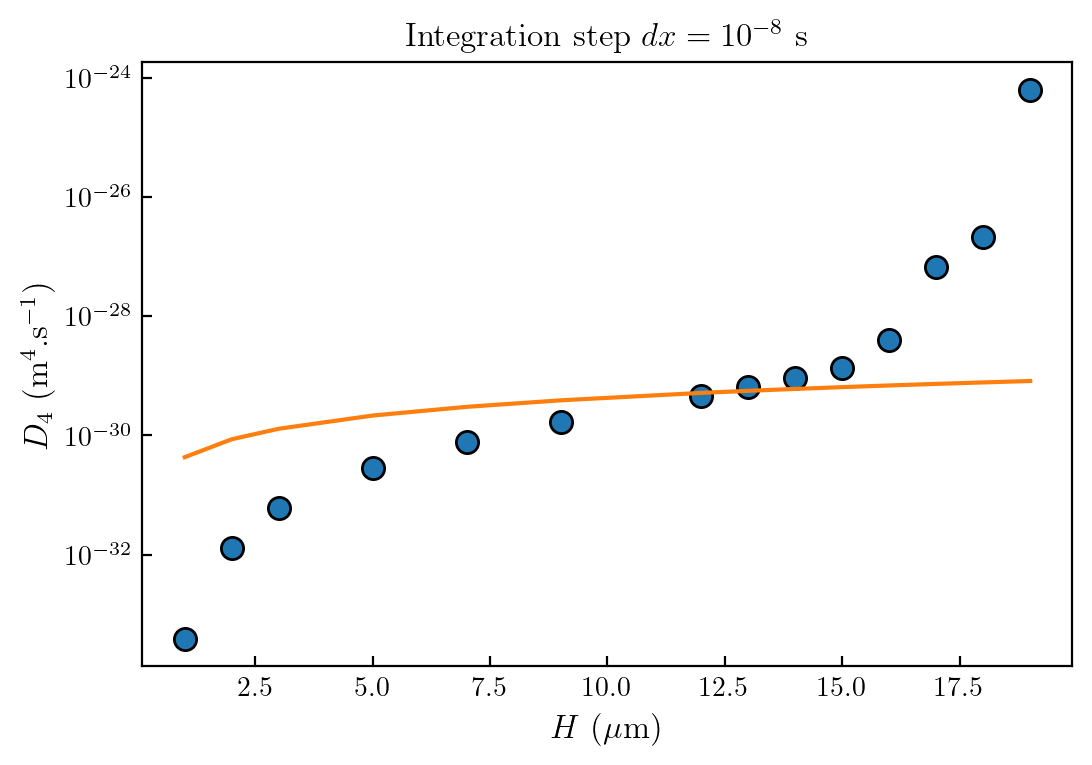

In [145]:
# plt.figure(figsize = (8, 5))
plt.semilogy(HH*1e6, list_D4_H, "o", markersize=8, markeredgewidth=1, markeredgecolor='k',)
plt.plot(HH*1e6, fonction(HH, a, b), "-")

plt.xlabel(r"$H$ $(\mu \mathrm{m})$")
plt.ylabel(r"$D_4$ $(\mathrm{m}^4.\mathrm{s}^{-1})$")
plt.title(r"Integration step $dx=10^{-8}~\mathrm{s}$")


In [165]:
# Load the data
yacine = loadmat("C4Stat_col1Hum_col2C400_col3D4_col4C4_col5Tc_forB4p8_Ld60nm_Lb550nm.mat", squeeze_me=True)

In [166]:
yacine

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Mar 30 16:49:44 2022',
 '__version__': '1.0',
 '__globals__': [],
 'StatsC4': array([[2.00000000e-06, 5.43627919e-29, 7.62291899e-28, 7.38575740e-27,
         1.40223096e+01],
        [2.50000000e-06, 6.57614769e-29, 9.95074009e-28, 1.02069715e-26,
         1.51315642e+01],
        [3.00000000e-06, 7.39014695e-29, 1.15050337e-27, 1.19457402e-26,
         1.55680716e+01],
        [4.00000000e-06, 8.42849093e-29, 1.32800876e-27, 1.36376894e-26,
         1.57561866e+01],
        [5.00000000e-06, 9.04919700e-29, 1.42286125e-27, 1.43911722e-26,
         1.57236189e+01],
        [6.00000000e-06, 9.45922099e-29, 1.48151814e-27, 1.48105298e-26,
         1.56621580e+01],
        [7.00000000e-06, 9.74966378e-29, 1.52133461e-27, 1.50769400e-26,
         1.56039700e+01],
        [8.00000000e-06, 9.96596932e-29, 1.55010433e-27, 1.52605526e-26,
         1.55539746e+01],
        [9.00000000e-06, 1.01332178e-28, 1.57184813e-27, 1

In [170]:
data_ya = yacine["StatsC4"]
Hs_ya = data_ya[:,0]
D4_ya = data_ya[:,2]
C4_ya = data_ya[:,3]

In [202]:
popt, pcov = curve_fit(fonction, Hs_ya[4:], D4_ya[4:], bounds=(0, [1.7e-27, 0.26e-5]))
popt, pcov

a,b=popt

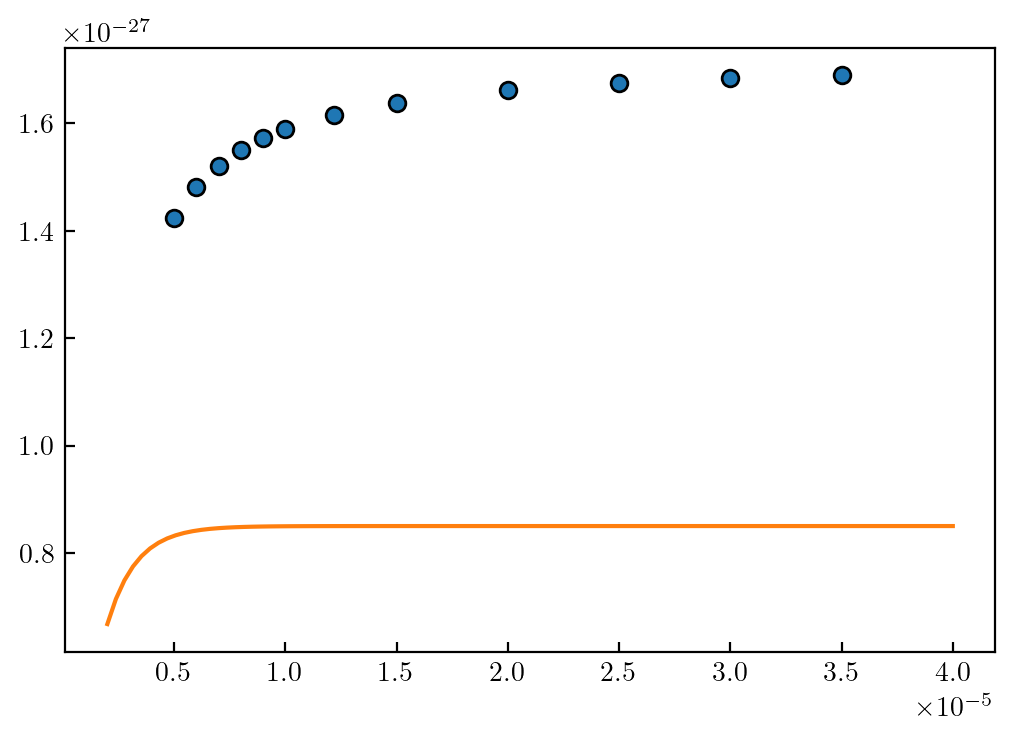

In [206]:
Hs = np.linspace(2e-6, 40e-6, 100)

plt.plot(Hs_ya[4:], D4_ya[4:], "o")
plt.plot(Hs, fonction(Hs, a, b))
